In [0]:
import smtplib

# server = smtplib.SMTP('smtp.gmail.com', 587)
# server.starttls()
# server.login('alevera1113@gmail.com', 'drrhvsgjahppvzch')

# msg = 'COLAB work finished!'
# server.sendmail('alevera1113@gmail.com', 'alevera1113@gmail.com', msg)
# server.quit()

In [0]:
import os, shutil

og_dataset_dir = '/content/drive/My Drive/Data/CatsvsDogs/Train'
base_dir = '/content/drive/My Drive/Data/CatsvsDogs_standardized'


In [0]:
# # just run once to make dir and copy files

train_dir = os.path.join(base_dir, 'train')
# os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
# os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
# os.mkdir(test_dir)


cats_train_dir = os.path.join(train_dir, 'cats')
# os.mkdir(cats_train_dir)

dogs_train_dir = os.path.join(train_dir, 'dogs')
# os.mkdir(dogs_train_dir)

cats_validation_dir = os.path.join(validation_dir, 'cats')
# os.mkdir(cats_validation_dir)

dogs_validation_dir = os.path.join(validation_dir, 'dogs')
# os.mkdir(dogs_validation_dir)

cats_test_dir = os.path.join(test_dir, 'cats')
# os.mkdir(cats_test_dir)

dogs_test_dir = os.path.join(test_dir, 'dogs')
# os.mkdir(dogs_test_dir)

In [0]:
fnames = ['cat.{}.jpg'.format(i) for i in range(5000)]

for  fname  in fnames:
  src = os.path.join(og_dataset_dir, fname)
  dst = os.path.join(cats_train_dir, fname)
  shutil.copyfile(src=src, dst=dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(5000, 6000)]

for  fname  in fnames:
  src = os.path.join(og_dataset_dir, fname)
  dst = os.path.join(cats_validation_dir, fname)
  shutil.copyfile(src=src, dst=dst)

  fnames = ['cat.{}.jpg'.format(i) for i in range(6000, 7000)]

for  fname  in fnames:
  src = os.path.join(og_dataset_dir, fname)
  dst = os.path.join(cats_test_dir, fname)
  shutil.copyfile(src=src, dst=dst)


fnames = ['dog.{}.jpg'.format(i) for i in range(5000)]

for  fname  in fnames:
  src = os.path.join(og_dataset_dir, fname)
  dst = os.path.join(dogs_train_dir, fname)
  shutil.copyfile(src=src, dst=dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(5000, 6000)]

for  fname  in fnames:
  src = os.path.join(og_dataset_dir, fname)
  dst = os.path.join(dogs_validation_dir, fname)
  shutil.copyfile(src=src, dst=dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(6000, 7000)]

for  fname  in fnames:
  src = os.path.join(og_dataset_dir, fname)
  dst = os.path.join(dogs_test_dir, fname)
  shutil.copyfile(src=src, dst=dst)

server = smtplib.SMTP('smtp.gmail.com', 587)
server.starttls()
server.login('alevera1113@gmail.com', 'drrhvsgjahppvzch')

msg = 'COLAB work finished!'
server.sendmail('alevera1113@gmail.com', 'alevera1113@gmail.com', msg)

{}

In [0]:
%tensorflow_version 2.x

In [5]:
from tensorflow.keras import layers 
from tensorflow.keras import models

model = models.Sequential ()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

ERROR! Session/line number was not unique in database. History logging moved to new session 60
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________

In [0]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150,150), batch_size=20, class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150,150), batch_size=20, class_mode='binary')

Found 10000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [14]:
for data_batch, labels_batch in train_generator:
  print('data batch shape: ', data_batch.shape)
  print('label batch shape: ', labels_batch.shape)
  break

data batch shape:  (20, 150, 150, 3)
label batch shape:  (20,)
data batch shape:  (20, 150, 150, 3)
label batch shape:  (20,)


KeyboardInterrupt: ignored

In [18]:
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=50, validation_data=validation_generator, validation_steps=50)

model.save('CatsvsDogs_small_1.h5')

server = smtplib.SMTP('smtp.gmail.com', 587)
server.starttls()
server.login('alevera1113@gmail.com', 'drrhvsgjahppvzch')

msg = 'COLAB work finished!'
server.sendmail('alevera1113@gmail.com', 'alevera1113@gmail.com', msg)
server.quit()

Epoch 1/50
100/100 [==============================] - 15s 151ms/step - loss: 0.3489 - acc: 0.8530 - val_loss: 0.4200 - val_acc: 0.8070
Epoch 2/50
100/100 [==============================] - 15s 152ms/step - loss: 0.3448 - acc: 0.8425 - val_loss: 0.3703 - val_acc: 0.8340
Epoch 3/50
100/100 [==============================] - 15s 152ms/step - loss: 0.3229 - acc: 0.8570 - val_loss: 0.3860 - val_acc: 0.8260
Epoch 4/50
100/100 [==============================] - 15s 151ms/step - loss: 0.3350 - acc: 0.8505 - val_loss: 0.3952 - val_acc: 0.8210
Epoch 5/50
100/100 [==============================] - 15s 150ms/step - loss: 0.3081 - acc: 0.8665 - val_loss: 0.3792 - val_acc: 0.8280
Epoch 6/50
100/100 [==============================] - 15s 150ms/step - loss: 0.3223 - acc: 0.8610 - val_loss: 0.4019 - val_acc: 0.8210
Epoch 7/50
100/100 [==============================] - 15s 151ms/step - loss: 0.3090 - acc: 0.8685 - val_loss: 0.4180 - val_acc: 0.8070
Epoch 8/50
100/100 [==============================] - 1

KeyboardInterrupt: ignored

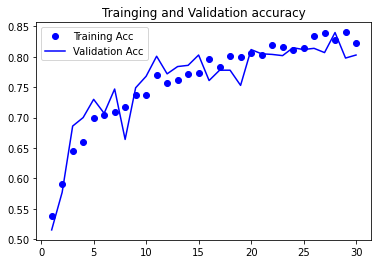

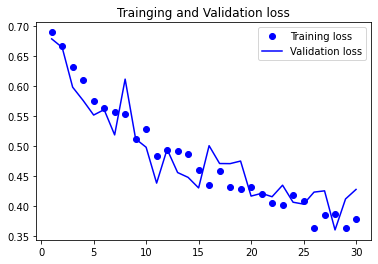

In [19]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title('Trainging and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Trainging and Validation loss')
plt.legend()

plt.show()

In [0]:
datagen = ImageDataGenerator(rotation_range=40, width_shift_range=.2, height_shift_range=.2, shear_range=.2, zoom_range=.2, horizontal_flip=True, fill_mode='nearest')

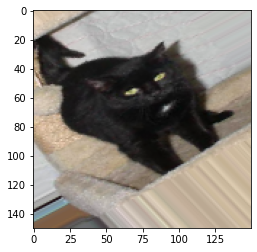

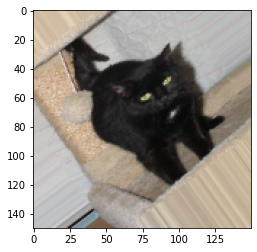

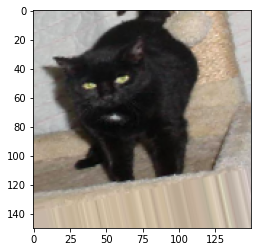

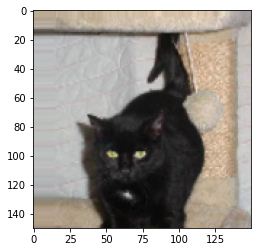

In [30]:
from keras.preprocessing import image 

fnames = [os.path.join(cats_train_dir, fname) for fname in os.listdir(cats_train_dir)]

img_path = fnames[3]

img = image.load_img(img_path, target_size=(150,150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(image.array_to_img(batch[0]))
  i += 1
  if (i % 4 == 0):
    break

plt.show()

In [31]:
model = models.Sequential ()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dropout(0.35))

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)      

In [0]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [34]:
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=.2, height_shift_range=.2, shear_range=.2, zoom_range=.2, horizontal_flip=True, fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150,150), batch_size=20, class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150,150), batch_size=20, class_mode='binary')

Found 10000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [37]:
history = model.fit_generator(
  train_generator, 
  steps_per_epoch=100, 
  epochs=125, 
  validation_data=validation_generator, 
  validation_steps=50
)

model.save('CatsvsDogs_small_2.h5')

server = smtplib.SMTP('smtp.gmail.com', 587)
server.starttls()
server.login('alevera1113@gmail.com', 'drrhvsgjahppvzch')

msg = 'COLAB work finished!'
server.sendmail('alevera1113@gmail.com', 'alevera1113@gmail.com', msg)
server.quit()

Epoch 1/125
100/100 [==============================] - 25s 254ms/step - loss: 0.6911 - acc: 0.5280 - val_loss: 0.6766 - val_acc: 0.5910
Epoch 2/125
100/100 [==============================] - 25s 254ms/step - loss: 0.6831 - acc: 0.5505 - val_loss: 0.6739 - val_acc: 0.5690
Epoch 3/125
100/100 [==============================] - 25s 253ms/step - loss: 0.6763 - acc: 0.5675 - val_loss: 0.6661 - val_acc: 0.5740
Epoch 4/125
100/100 [==============================] - 26s 255ms/step - loss: 0.6577 - acc: 0.6030 - val_loss: 0.6431 - val_acc: 0.6060
Epoch 5/125
100/100 [==============================] - 25s 254ms/step - loss: 0.6556 - acc: 0.6060 - val_loss: 0.6282 - val_acc: 0.6430
Epoch 6/125
100/100 [==============================] - 25s 251ms/step - loss: 0.6519 - acc: 0.6045 - val_loss: 0.6641 - val_acc: 0.5900
Epoch 7/125
100/100 [==============================] - 25s 254ms/step - loss: 0.6336 - acc: 0.6360 - val_loss: 0.6044 - val_acc: 0.6490
Epoch 8/125
100/100 [===========================

(221, b'2.0.0 closing connection z11sm8713014pfa.149 - gsmtp')

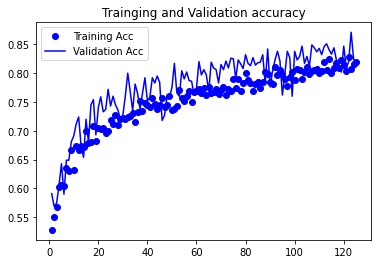

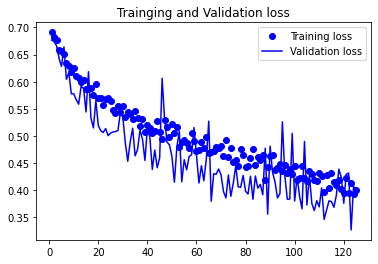

In [38]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title('Trainging and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Trainging and Validation loss')
plt.legend()

plt.show()